In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Đọc dữ liệu trong 2 ngày: 1/2/2007 - 2/2/2007

In [17]:
'''
dict_dtypes = {
    "Date" : "object",
    "Time": "object",
    "Global_active_power": "object",
    "Global_reactive_power": "object",
    "Voltage": "object",
    "Global_intensity": "object",
    "Sub_metering_1": "object",
    "Sub_metering_2": "object",
    "Sub_metering_3": "object"
}

electric_df = pd.read_csv('household_power_consumption.txt',sep = ';',dtype = dict_dtypes)
electric_df.Date = pd.to_datetime(electric_df.Date, format = '%d/%m/%Y')

electric_df.loc[(electric_df.Date >= '2007-2-1')&(electric_df.Date <= '2007-2-2'),:].reset_index().drop('index',axis = 1).to_csv('electric.csv', index = False)
'''

'\ndict_dtypes = {\n    "Date" : "object",\n    "Time": "object",\n    "Global_active_power": "object",\n    "Global_reactive_power": "object",\n    "Voltage": "object",\n    "Global_intensity": "object",\n    "Sub_metering_1": "object",\n    "Sub_metering_2": "object",\n    "Sub_metering_3": "object"\n}\n\nelectric_df = pd.read_csv(\'household_power_consumption.txt\',sep = \';\',dtype = dict_dtypes)\nelectric_df.Date = pd.to_datetime(electric_df.Date, format = \'%d/%m/%Y\')\n\nelectric_df.loc[(electric_df.Date >= \'2007-2-1\')&(electric_df.Date <= \'2007-2-2\'),:].reset_index().drop(\'index\',axis = 1).to_csv(\'electric.csv\', index = False)\n'

In [18]:
electric_df = pd.read_csv('electric.csv')
electric_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-02-01,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
1,2007-02-01,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
2,2007-02-01,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
3,2007-02-01,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
4,2007-02-01,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2875,2007-02-02,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0
2876,2007-02-02,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0
2877,2007-02-02,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0
2878,2007-02-02,23:58:00,3.658,0.220,239.61,15.2,0.0,1.0,17.0


In [19]:
electric_df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

Convert thành float được, tức là ko có dữ liệu '?' ở mấy cột này

In [20]:
electric_df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [21]:
(electric_df.loc[:,'Time'] == '?').any()

False

In [22]:
(electric_df.loc[:,'Date'] == '?').any()

False

In [23]:
electric_df.Time = pd.to_datetime(electric_df.Time, format = '%H:%M:%S').dt.time
electric_df.Date = pd.to_datetime(electric_df.Date, format = '%Y-%m-%d')

In [27]:
electric_df["Time"] = electric_df.Date.dt.strftime('%Y-%m-%d') + " " + electric_df.Time.astype(str)
electric_df["Time"] = pd.to_datetime(electric_df["Time"], format="%Y-%m-%d %H:%M:%S")

In [28]:
electric_df.Date = pd.to_datetime(electric_df.Date, format = '%Y-%m-%d')

In [29]:
electric_df.dtypes

Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [30]:
electric_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-02-01,2007-02-01 00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
1,2007-02-01,2007-02-01 00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
2,2007-02-01,2007-02-01 00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
3,2007-02-01,2007-02-01 00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
4,2007-02-01,2007-02-01 00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0


In [98]:
def plot1():
    bin = [0,1,2,3,4,5,6]
    plt.figure(figsize = (25,16))
    plt.hist(electric_df['Global_active_power'], bins = bin, color = 'red')
    plt.xlabel('Global Active Power(kilowatts)', fontsize = 22)
    plt.ylabel('Frquency', fontsize = 20)
    plt.title('Global Active Power', fontsize = 22)
    plt.show()

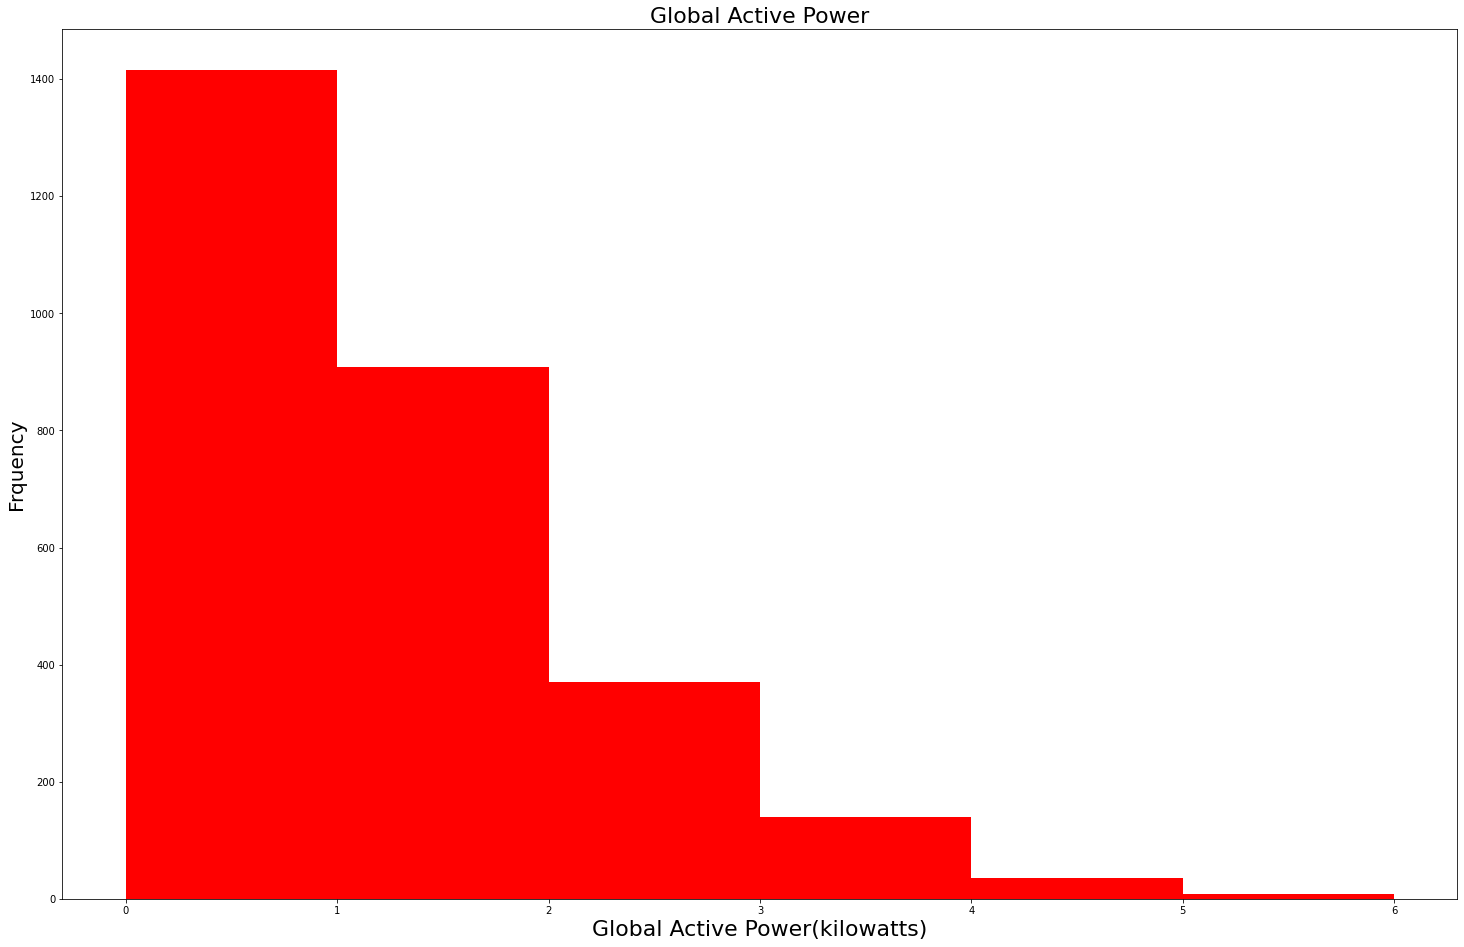

In [99]:
plot1()

In [106]:
def plot2():
    fig, ax2 = plt.subplots(figsize = (25,16))
    plt.plot(electric_df['Time'], electric_df['Global_active_power'], color = 'black')
    ax2.xaxis.set(
        major_locator=mdates.DayLocator(),
        major_formatter=mdates.DateFormatter("\n\n%A"),
        minor_formatter=mdates.DateFormatter("%H"),

    )
    plt.ylabel('Global Active Power(kilowatts)', fontsize = 20)
    plt.show()

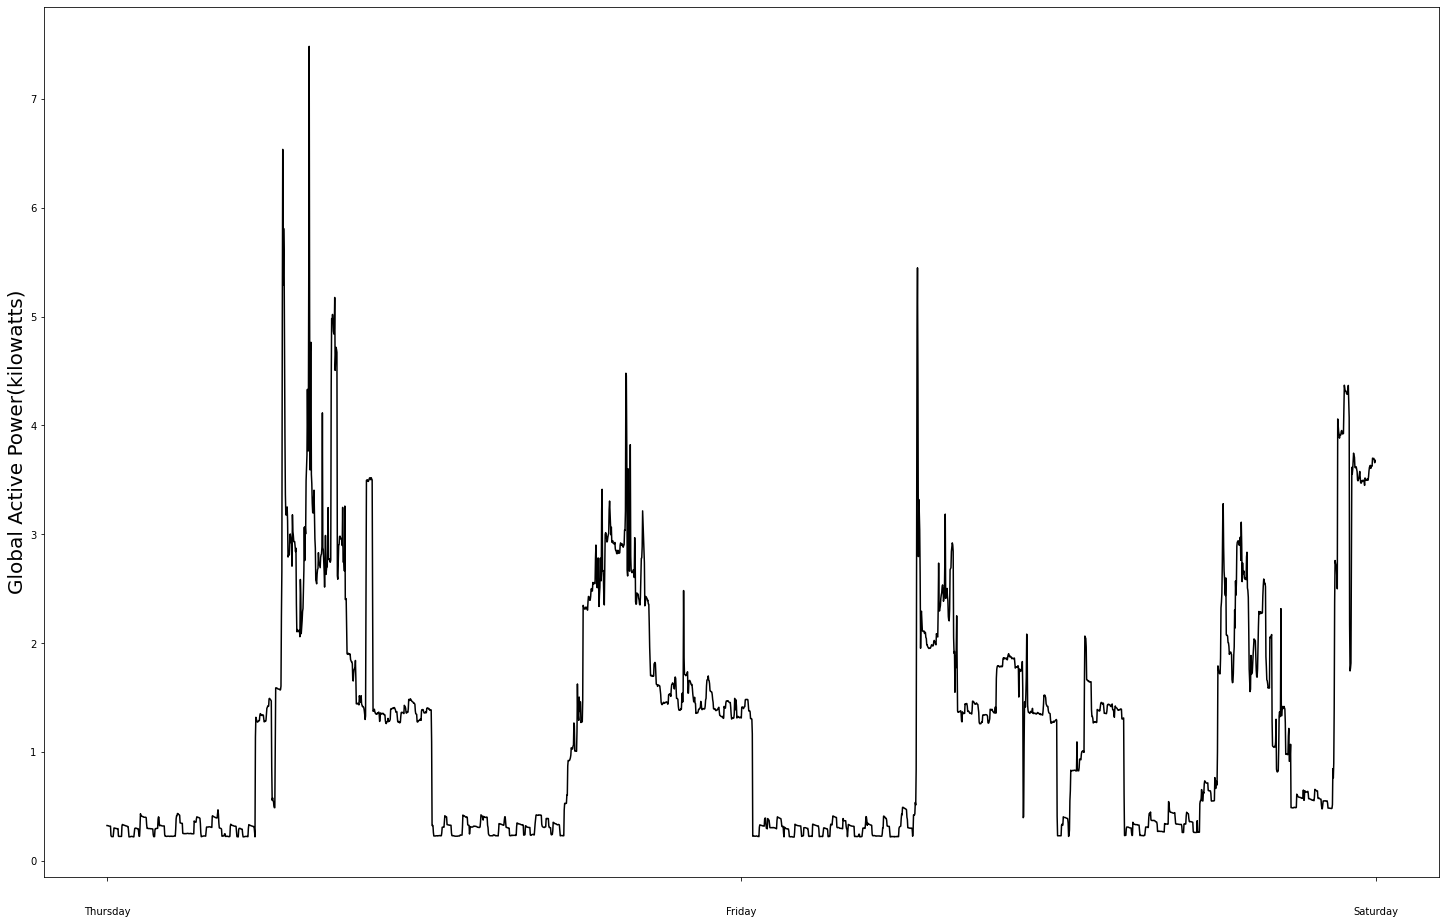

In [107]:
plot2()

In [59]:
def plot3():
    fig, ax3 = plt.subplots(figsize = (25,16))
    plt.plot(electric_df['Time'], electric_df['Sub_metering_1'], label = 'Sub_metering_1', color = 'black')
    plt.plot(electric_df['Time'], electric_df['Sub_metering_2'], label = 'Sub_metering_2', color = 'red')
    plt.plot(electric_df['Time'], electric_df['Sub_metering_3'], label = 'Sub_metering_3', color = 'blue')
    
    ax3.xaxis.set(
        major_locator=mdates.DayLocator(),
        major_formatter=mdates.DateFormatter("\n\n%A"),
        minor_locator=mdates.HourLocator((3,6, 9 ,12, 15 ,18,21)),
        minor_formatter=mdates.DateFormatter("%H"),
    )
    plt.ylabel('Energy sub metering', fontsize = 20)
    plt.legend(fontsize = 20)
    plt.show()

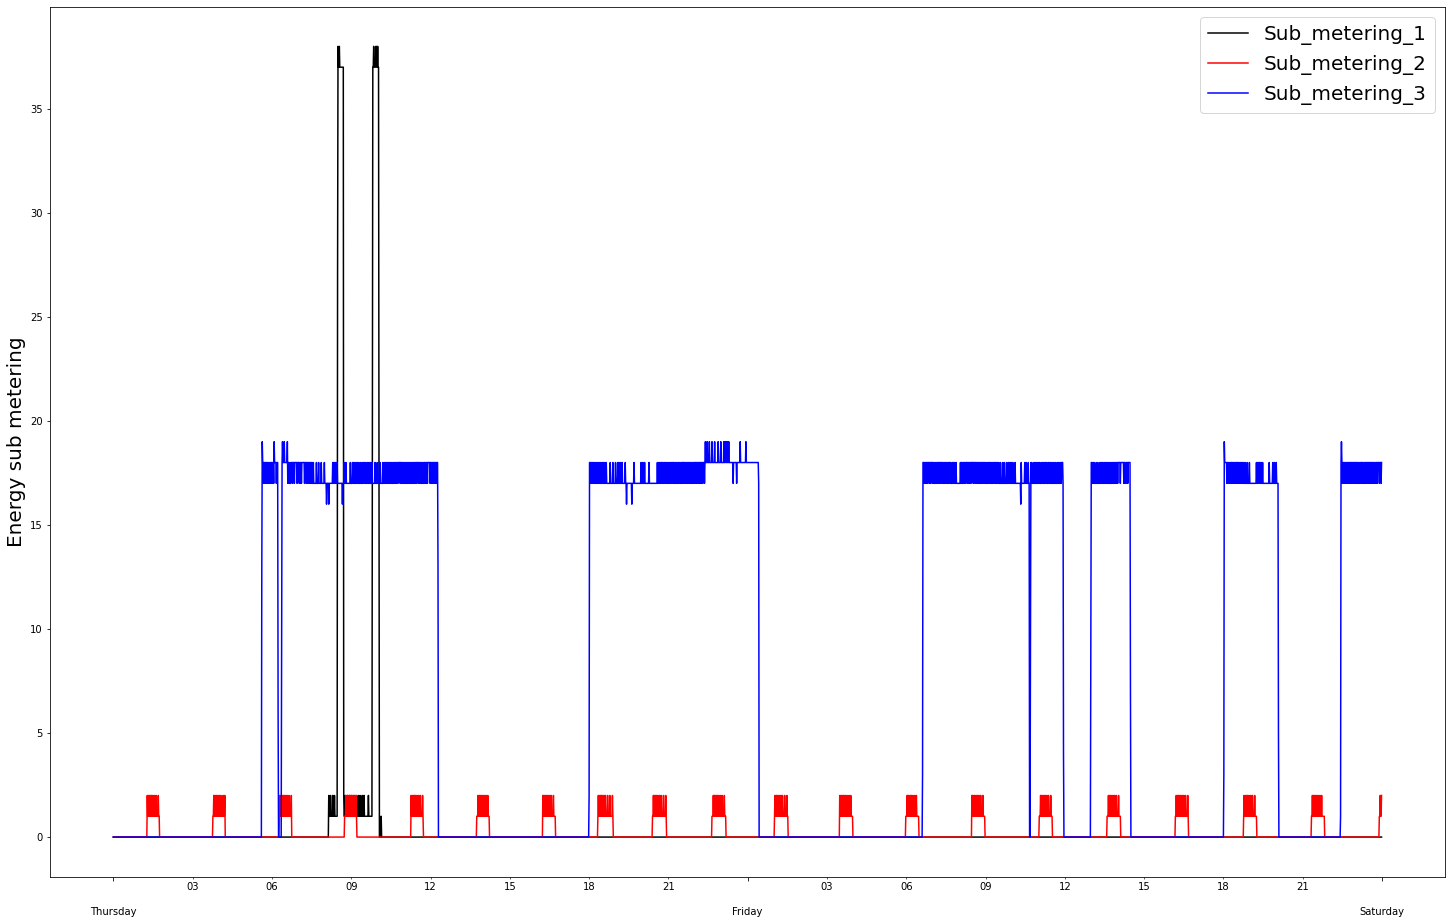

In [60]:
plot3()

In [91]:
def plot4a():
    fig, ax4 = plt.subplots(figsize = (25,16))
    plt.plot(electric_df['Time'], electric_df['Voltage'], color = 'black')
    ax4.xaxis.set(
        major_locator=mdates.DayLocator(),
        major_formatter=mdates.DateFormatter("\n\n%A"),
        minor_formatter=mdates.DateFormatter("%H"),

    )
    plt.ylabel('Voltage', fontsize = 20)
    plt.show()

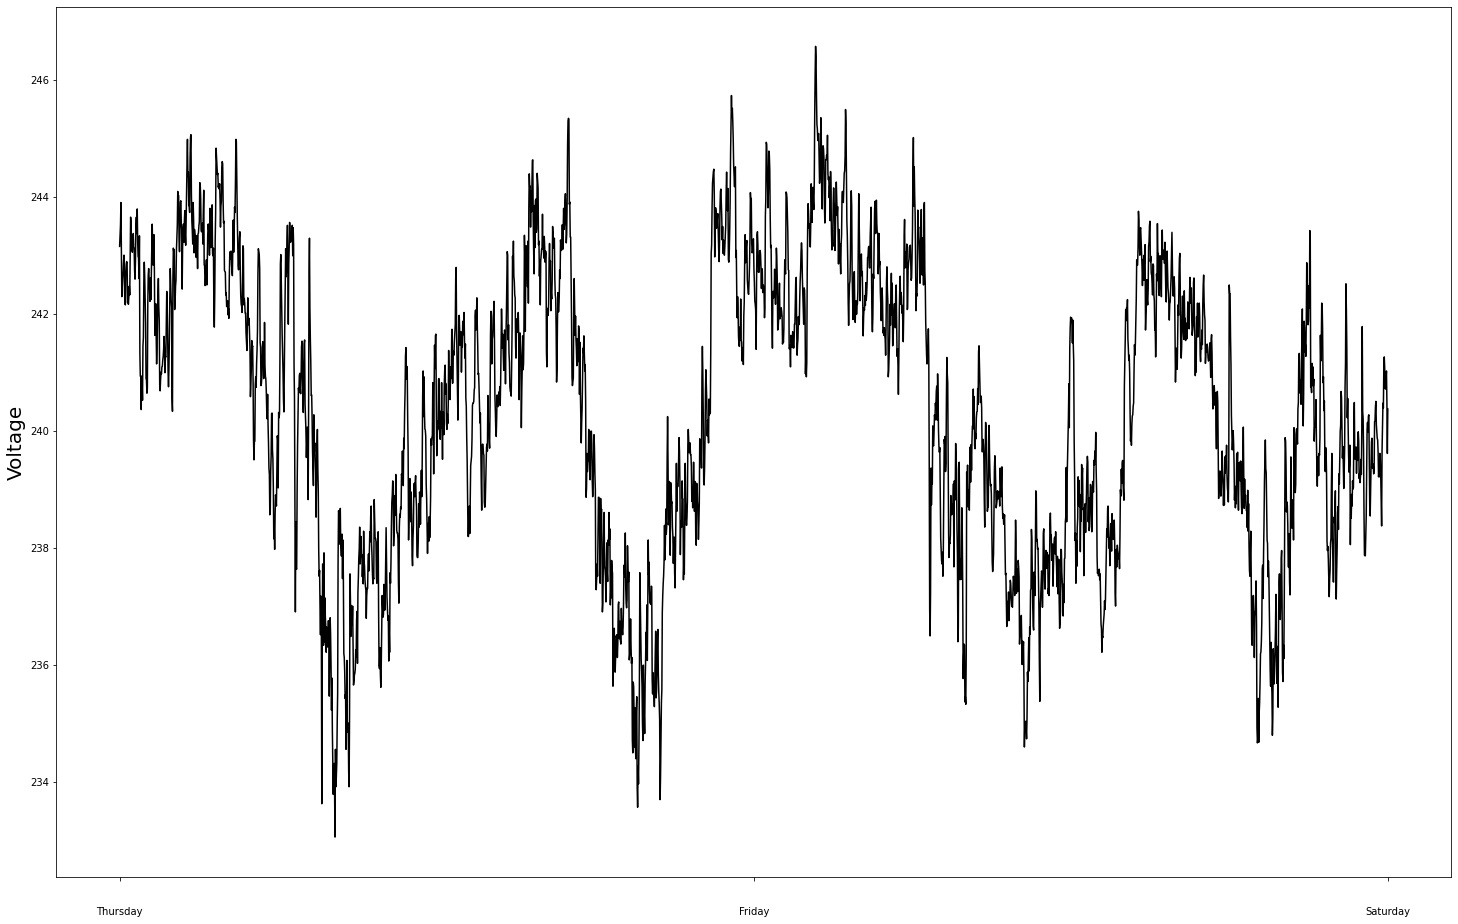

In [92]:
plot4a()

In [75]:
def plot4b():
    fig, ax4 = plt.subplots(figsize = (25,16))
    plt.plot(electric_df['Time'], electric_df['Global_reactive_power'], color = 'black')
    ax4.xaxis.set(
        major_locator=mdates.DayLocator(),
        major_formatter=mdates.DateFormatter("\n\n%A"),
        minor_formatter=mdates.DateFormatter("%H"),

    )
    plt.ylabel('Global Reactive Power', fontsize = 20)
    plt.show()

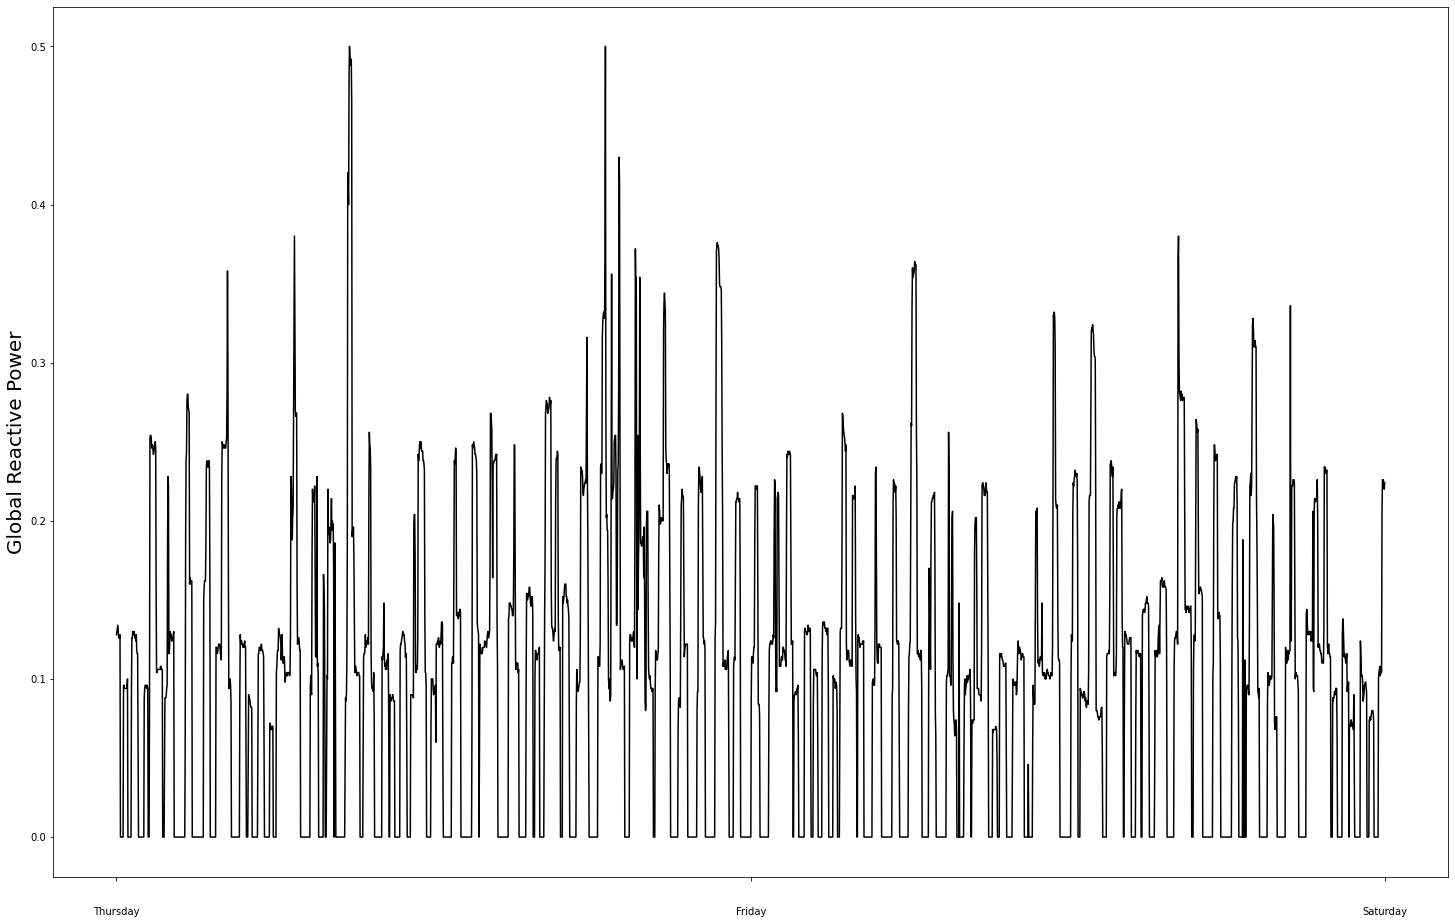

In [76]:
plot4b()

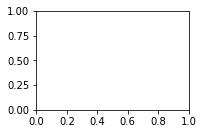

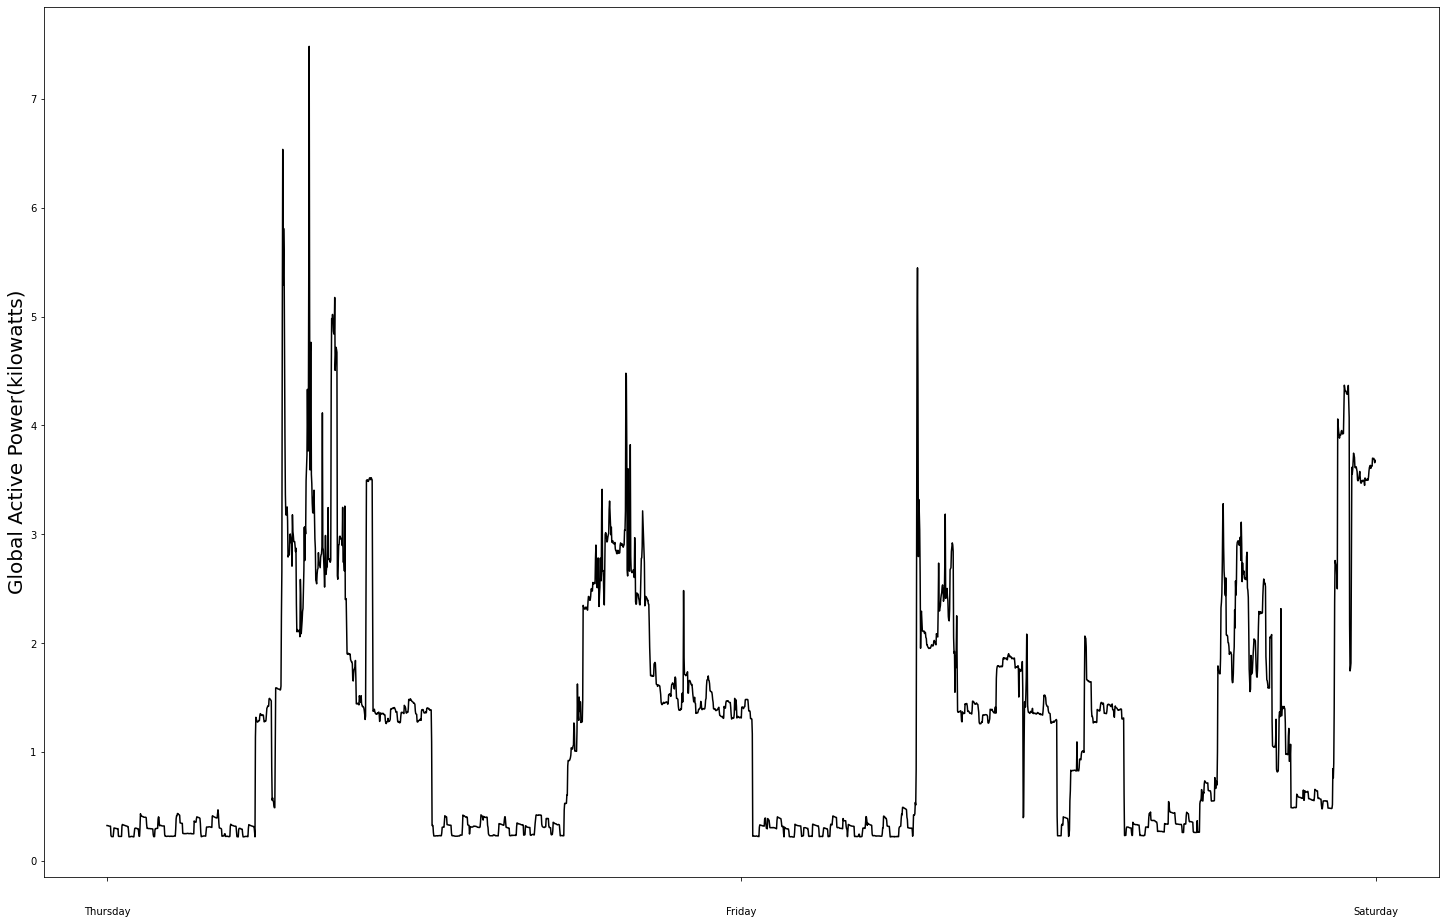

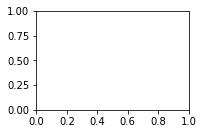

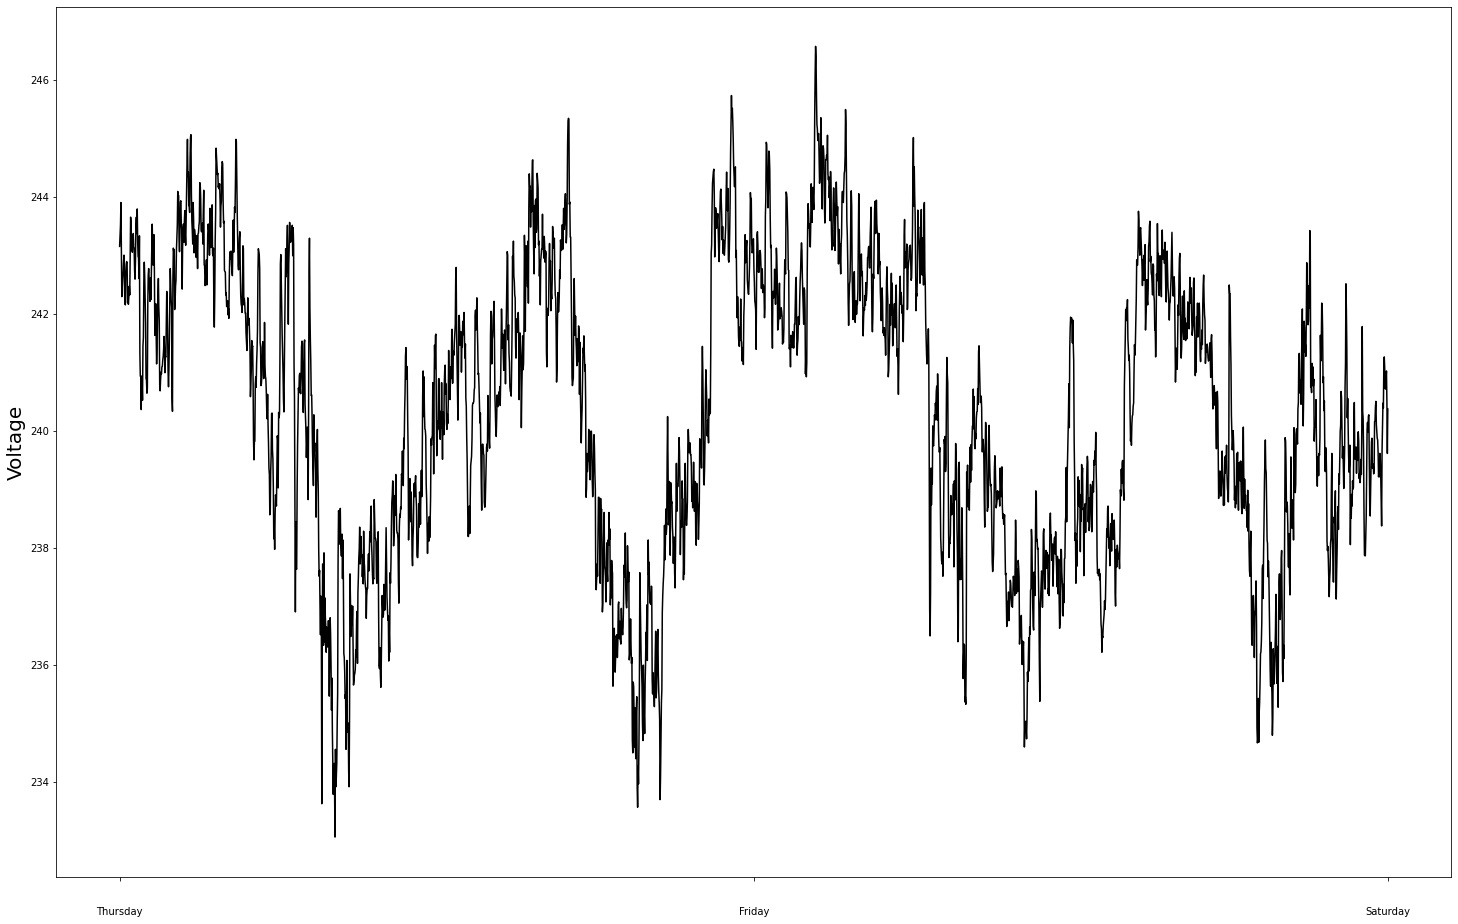

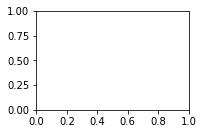

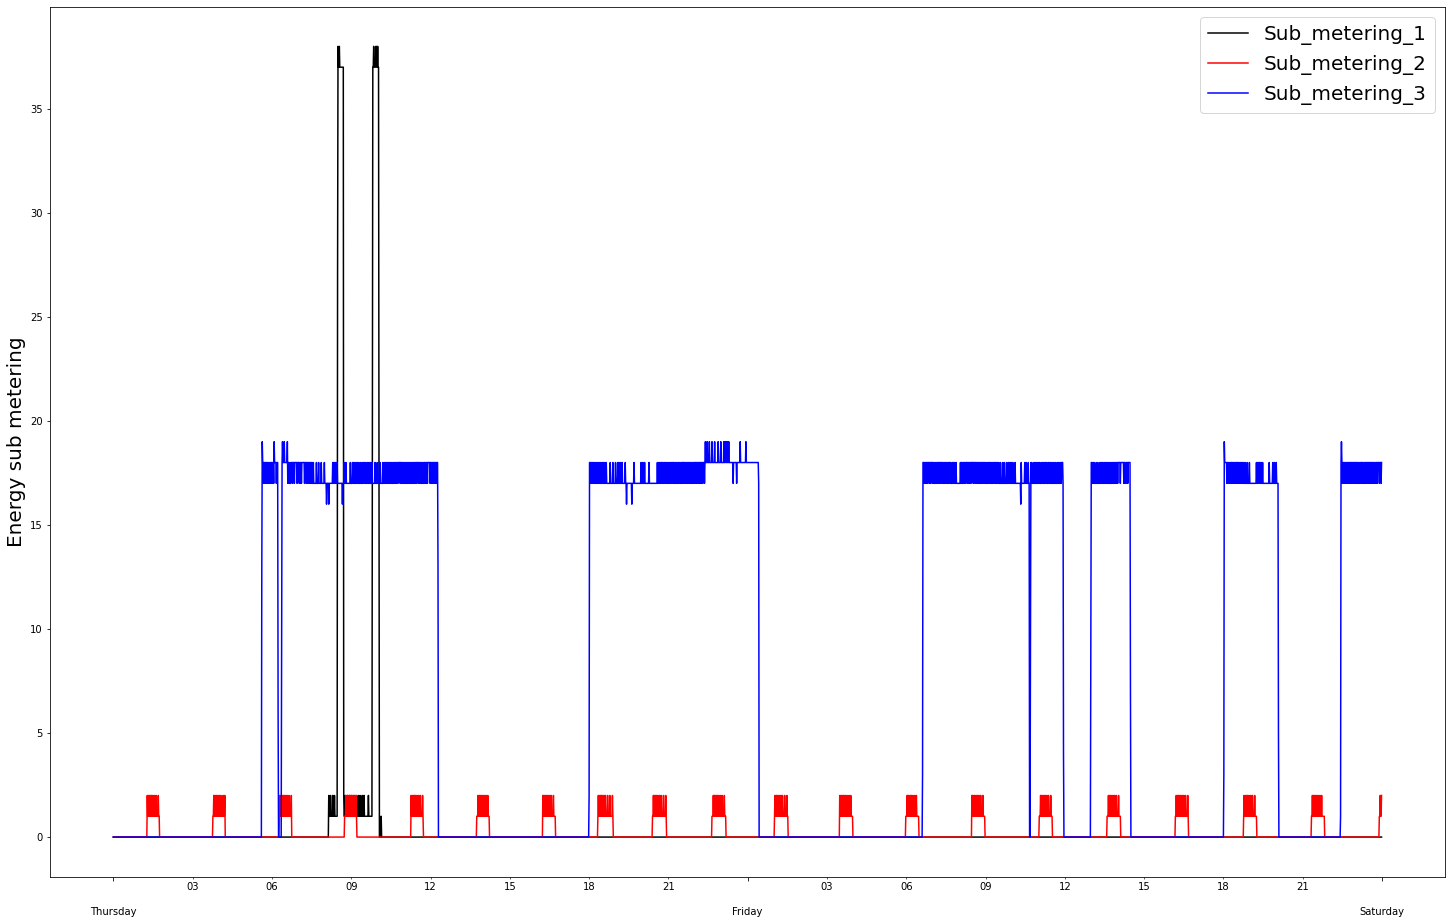

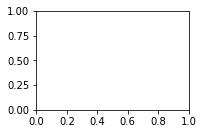

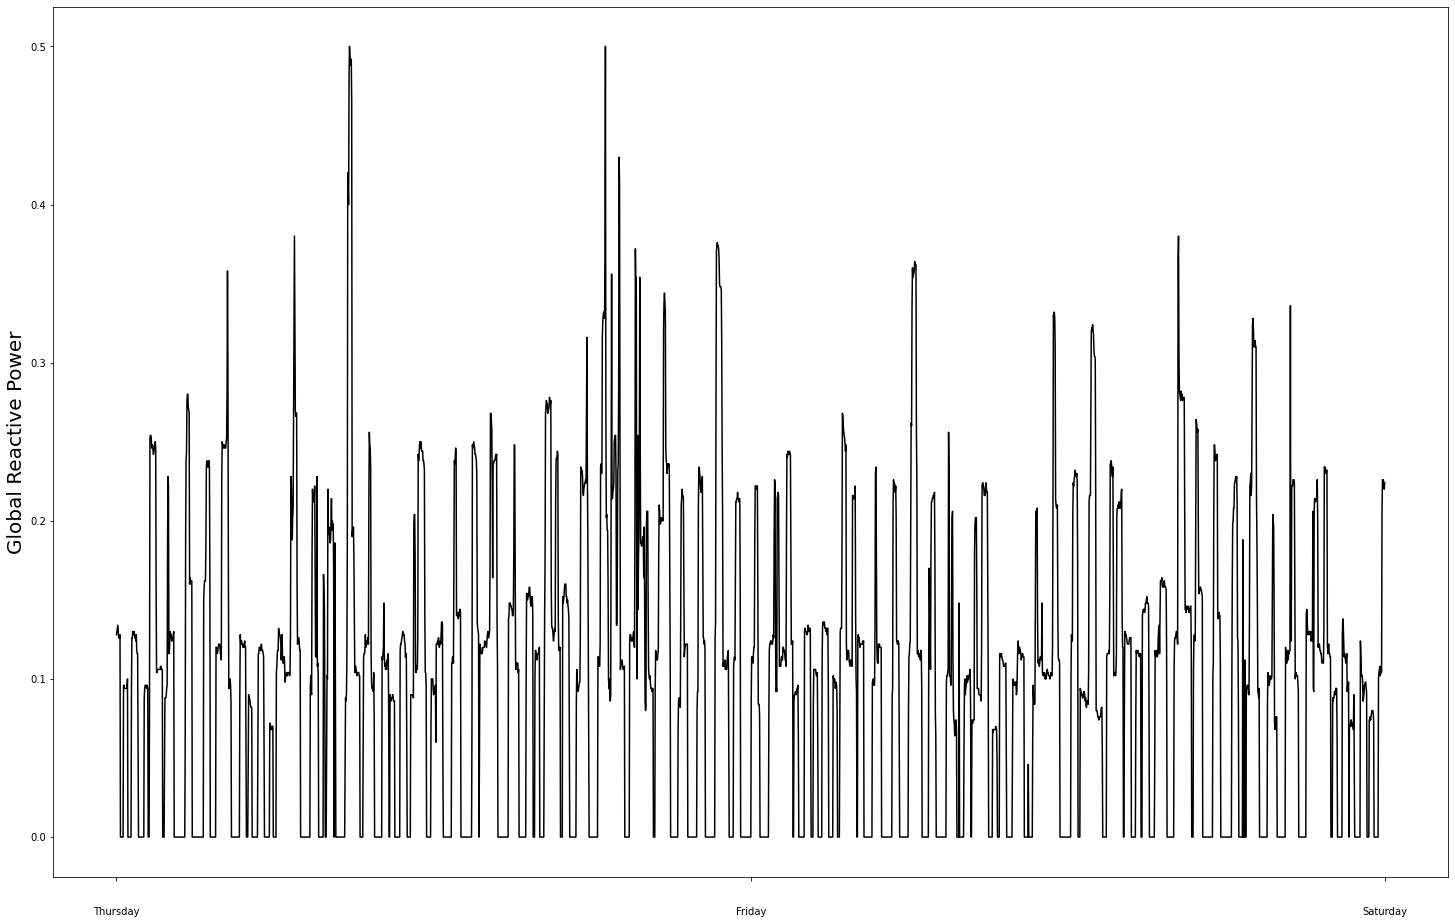

In [93]:
fig = plt.figure()
a1 = plt.subplot(2,2,1)
a1 = plot2()
plt.subplot(2,2,2)
a2 = plot4a()
plt.subplot(2,2,3)
a3 = plot3()
plt.subplot(2,2,4)
a4 = plot4b()